# Redes Neurais

Toda a parte teorica está num curso separado.

Na parte de English ML-AZ nâo há essa parte, mas eu adaptei o exemplo de classificação

Recomedações

````
Livro Make your Own Neural Network: A gentle journey through the mathematics of neural networks, and making you own using the Python computer language de Tariq Rashid: este livro mostra a matemática envolvida nas redes neurais e também mostra a implementação em Python

Livro Fundamental of Neural Networks: Architectures, Algorithms and Applications de Laurene Fausett: este livro apresenta fundamentos teóricos com várias aplicações práticas

Livro Machine Learning with Neural Networks: An In-depth Visual Introduction with Python: Make Your Own Neural Network in Python: A Simple Guide on Machine Learning with Neural Networks de Michael Taylor: este é um dos livros mais didáticos sobre redes neurais
````

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file_path = "../../files/"

## Base `credit_data`

In [2]:
base = pd.read_csv(file_path + 'credit_data.csv')
base.loc[base.age < 0, 'age'] = 40.92
               
previsores = base.iloc[:, 1:4].values
classe = base.iloc[:, 4].values

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(previsores[:, 1:4])
previsores[:, 1:4] = imputer.transform(previsores[:, 1:4])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(
    previsores, classe, test_size=0.25, random_state=0)

### Classificador Redes Neurais

In [12]:
from sklearn.neural_network import MLPClassifier
classificador = MLPClassifier(verbose = True,
                          max_iter=1000,
                          tol = 0.0000010,
                          solver = 'adam',
                          hidden_layer_sizes=(100),
                          activation='relu')
classificador.fit(previsores_treinamento, classe_treinamento)
previsoes = classificador.predict(previsores_teste)

### Avaliando

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)
print("Accuracy\n", precisao, "\n")
print("Matrix de Confusao\n",matriz, "\n")
print("Matrix de Confusao Porcentagem\n",matriz/matriz.sum(), "\n")
print(classification_report(classe_teste,previsoes))

Accuracy
 0.996 

Matrix de Confusao
 [[435   1]
 [  1  63]] 

Matrix de Confusao Porcentagem
 [[0.87  0.002]
 [0.002 0.126]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       436
           1       0.98      0.98      0.98        64

    accuracy                           1.00       500
   macro avg       0.99      0.99      0.99       500
weighted avg       1.00      1.00      1.00       500



## Base `census`

In [5]:
base = pd.read_csv(file_path + 'census.csv')

previsores = base.iloc[:, 0:14].values
classe = base.iloc[:, 14].values
                
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

column_tranformer = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(), [1, 3, 5, 6, 7, 8, 9, 13])],
    remainder='passthrough')
previsores = column_tranformer.fit_transform(previsores).toarray()

labelencorder_classe = LabelEncoder()
classe = labelencorder_classe.fit_transform(classe)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(
    previsores, classe, test_size=0.15, random_state=0)

### Classificador Redes Neurais

In [11]:
# Alterar para max_iter = 1000
from sklearn.neural_network import MLPClassifier
classificador = MLPClassifier(verbose = True, max_iter=100, tol=0.000010)
classificador.fit(previsores_treinamento, classe_treinamento)
previsoes = classificador.predict(previsores_teste)
# print(classificador.out_activation_) ## printa as interaçôes e o erro

Iteration 1, loss = 0.36829350
Iteration 2, loss = 0.32258083
Iteration 3, loss = 0.31301986
Iteration 4, loss = 0.30696831
Iteration 5, loss = 0.30221291
Iteration 6, loss = 0.29987392
Iteration 7, loss = 0.29681099
Iteration 8, loss = 0.29375126
Iteration 9, loss = 0.29175118
Iteration 10, loss = 0.29006386
Iteration 11, loss = 0.28829255
Iteration 12, loss = 0.28595412
Iteration 13, loss = 0.28450815
Iteration 14, loss = 0.28317018
Iteration 15, loss = 0.28182297
Iteration 16, loss = 0.28088373
logistic


/home/rhavel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


### Avaliando

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)
print("Accuracy\n", precisao, "\n")
print("Matrix de Confusao\n",matriz, "\n")
print("Matrix de Confusao Porcentagem\n",matriz/matriz.sum(), "\n")
print(classification_report(classe_teste,previsoes))

Accuracy
 0.8454452405322416 

Matrix de Confusao
 [[3375  318]
 [ 437  755]] 

Matrix de Confusao Porcentagem
 [[0.69089048 0.06509724]
 [0.08945752 0.15455476]] 

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      3693
           1       0.70      0.63      0.67      1192

    accuracy                           0.85      4885
   macro avg       0.79      0.77      0.78      4885
weighted avg       0.84      0.85      0.84      4885



## English ML-AZ - My Neural Network

In [15]:
# Importing the dataset
dataset = pd.read_csv(file_path + 'Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
# Classificador
from sklearn.neural_network import MLPClassifier
classificador = MLPClassifier(verbose = True,
                          max_iter=1000,
                          tol = 0.0000010,
                          solver = 'adam',
                          hidden_layer_sizes=(100),
                          activation='relu')
classificador.fit(X_train, y_train)
y_pred = classificador.predict(X_test)

In [19]:
# Avaliando
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
precisao = accuracy_score(y_test, y_pred)
matriz = confusion_matrix(y_test, y_pred)
print("Accuracy\n", precisao, "\n")
print("Matrix de Confusao\n", matriz, "\n")
print("Matrix de Confusao Porcentagem\n", matriz/matriz.sum(), "\n")
print(classification_report(y_test, y_pred))

Accuracy
 0.93 

Matrix de Confusao
 [[64  4]
 [ 3 29]] 

Matrix de Confusao Porcentagem
 [[0.64 0.04]
 [0.03 0.29]] 

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


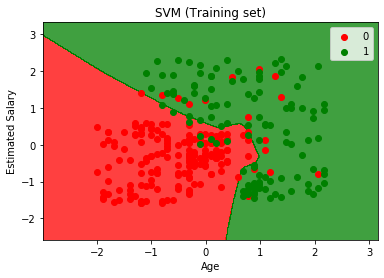

In [21]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classificador.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Neural Network  (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


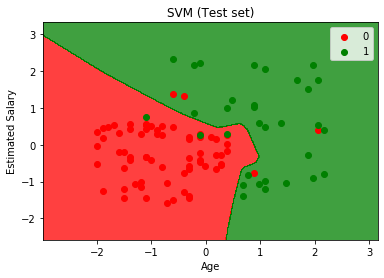

In [22]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classificador.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Neural Network (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()